# 任务

任务: 新闻文本分类,类别数目为46.

数据集: 数据集包含有来自于路透社的11228条新闻数据，被标记了超过46个分类。和IMDB数据集一样，每一条数据被编码为一条索引序列。

### 加载模块

In [1]:
from keras.datasets import reuters
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### 加载数据集

In [3]:
#加载reuters数据集,取前10000个词
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

观察数据集: 数据集shape, 每条语句格式

In [4]:
print(len(train_data),len(test_data))

8982 2246


In [5]:
print(train_data[0])#数字化

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


数据集中每条语句由:词典中词的index组成.

想办法将转换后的数字表示逆向化，得到原始文本内容；

In [6]:
word_index = reuters.get_word_index()# 单词--下标 对应字典
index_word = dict([(val,key) for (key,val) in word_index.items()])

def getOriSeq(data, index):
    origin_seq = ' '.join([index_word.get(i - 3, '?') for i in data[index]])
    return origin_seq

In [7]:
# 查看训练集中第一条语句的内容
train1_seq = getOriSeq(train_data, 0)
print(train1_seq)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [8]:
type(train_data[0])

list

### 数据集处理

转换成tensor形式: 当前每句话格式为list形式, 转换成numpy形式.

#### 训练集，测试集转换

In [10]:
#数据处理--向量化: 词袋模型
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [11]:
# 训练集,测试集转换
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#### 标签转换

标签处理有两种方法：
1. one-hot编码(categorical encoding)；
2. 直接转换成数字向量；

#### one-hot处理

In [12]:
# one-hot: 每个类别变成46维,哪个维度为1表示语句的所属类别
def to_one_hot(labels, dimension=46):# 46个类别
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [13]:
# 查看转换后的标签:第一个标签
one_hot_train_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**使用keras自带的函数转换**,也是one-hot转换.

In [14]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 模型定义

定义数据处理过程.

In [15]:
model = models.Sequential()

model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
# 输出单元有46个,对应46个类别
model.add(layers.Dense(46,activation='softmax'))

### 数据集划分

划分验证集,训练过程中进行验证.

In [16]:
# 取前1000条语句, train数据集一共就8982条
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### 模型编译

指定优化算法,loss函数,评测指标;

多分类loss函数一般为categorical_crossentropy.

In [17]:
# 模型训练
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])

## 模型训练

指定训练数据,epoch,batch_size以及可选的验证集[()指定].

In [18]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,\
                    batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 170us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 72us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 77us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 76us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 77us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 80us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 77us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020
Epoch 

## 首次训练之后

观测训练过程,发现训练过程中可能出现的问题,调整,重新训练.

画图观察损失函数变化以及准确率变化情况

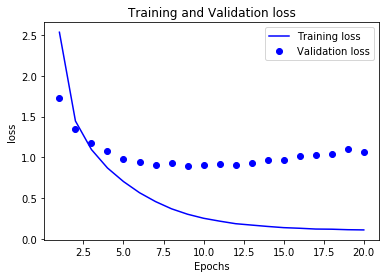

In [19]:
# 损失函数变化
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(train_loss)+1)
plt.plot(epochs,train_loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'bo',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

训练集loss随着epoch数目增加,loss逐渐降低,符合预期;验证集loss随着epoch增加,先降低,然后稳定,保持不变.

验证集loss和训练集loss之间的差距较大,可能发生过拟合现象.

**观察准确率变化**

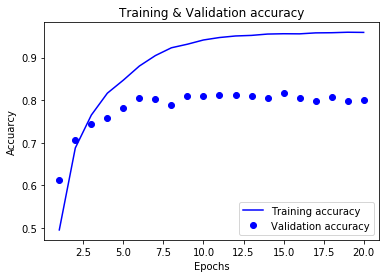

In [20]:
# 准确率变化
plt.clf()
train_acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1,len(train_acc)+1)

plt.plot(epochs,train_acc,'b',label='Training accuracy')
plt.plot(epochs,val_acc,'bo',label='Validation accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()

plt.show()

训练集准确率和验证集准确率之间的差距随着epoch增加逐渐增大. 从第9个epochs开始模型,验证集准确率趋于稳定.可以确定发生过拟合现象。提前终止,来处理过拟合. 让epochs=9，重新训练模型。

In [21]:
# 重新训练
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
# 不指定验证集
model.fit(x_train,one_hot_train_labels,epochs=9,batch_size=512)

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
8982/8982 [==============================] - 1s 80us/step - loss: 2.4437 - acc: 0.5332
Epoch 2/9
8982/8982 [==============================] - 1s 69us/step - loss: 1.3241 - acc: 0.7161
Epoch 3/9
8982/8982 [==============================] - 1s 68us/step - loss: 0.9744 - acc: 0.7869
Epoch 4/9
8982/8982 [==============================] - 1s 68us/step - loss: 0.7565 - acc: 0.8390
Epoch 5/9
8982/8982 [==============================] - 1s 69us/step - loss: 0.5963 - acc: 0.8764
Epoch 6/9
8982/8982 [==============================] - 1s 69us/step - loss: 0.4751 - acc: 0.9009
Epoch 7/9
8982/8982 [==============================] - 1s 68us/step - loss: 0.3831 - acc: 0.9175
Epoch 8/9
8982/8982 [==============================] - 1s 70us/step - loss: 0.3076 - acc: 0.9348
Epoch 9/9
2246/2246 [==============================] - 0s 98us/step


In [22]:
results

[0.9800226720230768, 0.7902938557966204]

准确率为79.0%

## 其他实验

测试实验一：使用更大的神经元 128

In [23]:
model = models.Sequential()

model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 130us/step - loss: 2.1361 - acc: 0.5826 - val_loss: 1.3860 - val_acc: 0.6930
Epoch 2/20
7982/7982 [==============================] - 1s 99us/step - loss: 1.0770 - acc: 0.7690 - val_loss: 1.0795 - val_acc: 0.7710
Epoch 3/20
7982/7982 [==============================] - 1s 89us/step - loss: 0.7405 - acc: 0.8455 - val_loss: 0.9623 - val_acc: 0.7960
Epoch 4/20
7982/7982 [==============================] - 1s 89us/step - loss: 0.5409 - acc: 0.8869 - val_loss: 0.9047 - val_acc: 0.8030
Epoch 5/20
7982/7982 [==============================] - 1s 95us/step - loss: 0.3990 - acc: 0.9176 - val_loss: 0.8918 - val_acc: 0.8180
Epoch 6/20
7982/7982 [==============================] - 1s 89us/step - loss: 0.2991 - acc: 0.9369 - val_loss: 0.8507 - val_acc: 0.8260
Epoch 7/20
7982/7982 [==============================] - 1s 89us/step - loss: 0.2476 - acc: 0.9434 - val_loss: 0.9051 - val_acc: 0.8090
Epoch 

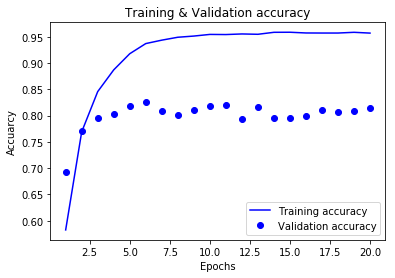

In [24]:
plt.clf()
train_acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(train_acc)+1)

plt.plot(epochs,train_acc,'b',label='Training accuracy')
plt.plot(epochs,val_acc,'bo',label='Validation accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()

plt.show()

同样,发生过拟合现象.

使用相同的epochs，在测试集上比较

In [25]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=128,validation_data=(x_val, y_val))
bigger_results = model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 146us/step - loss: 1.5790 - acc: 0.6609 - val_loss: 1.1920 - val_acc: 0.7250
Epoch 2/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.7680 - acc: 0.8341 - val_loss: 0.9639 - val_acc: 0.7830
Epoch 3/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.4598 - acc: 0.9023 - val_loss: 0.8420 - val_acc: 0.8220
Epoch 4/9
7982/7982 [==============================] - 1s 125us/step - loss: 0.2981 - acc: 0.9332 - val_loss: 0.8434 - val_acc: 0.8270
Epoch 5/9
7982/7982 [==============================] - 1s 126us/step - loss: 0.2325 - acc: 0.9442 - val_loss: 0.8498 - val_acc: 0.8340
Epoch 6/9
7982/7982 [==============================] - 1s 125us/step - loss: 0.1904 - acc: 0.9499 - val_loss: 0.9768 - val_acc: 0.7970
Epoch 7/9
7982/7982 [==============================] - 1s 126us/step - loss: 0.1694 - acc: 0.9516 - val_loss: 0.9949 - val_acc: 0.8070
Epoch 8

In [26]:
bigger_results 

[1.1618072003630369, 0.7898486198215535]

准确率相比之前,反而降低了0.1%. 常规情况下,神经元越多,网络层表示能力越强,这里显然不是这样.

实验二：使用更小的神经元：32个

In [27]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=128,validation_data=(x_val, y_val))
smaller_results = model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 93us/step - loss: 2.3260 - acc: 0.5105 - val_loss: 1.5617 - val_acc: 0.6370
Epoch 2/9
7982/7982 [==============================] - 1s 74us/step - loss: 1.2783 - acc: 0.7169 - val_loss: 1.2145 - val_acc: 0.7290
Epoch 3/9
7982/7982 [==============================] - 1s 74us/step - loss: 0.9372 - acc: 0.8027 - val_loss: 1.0542 - val_acc: 0.7820
Epoch 4/9
7982/7982 [==============================] - 1s 76us/step - loss: 0.7231 - acc: 0.8455 - val_loss: 0.9773 - val_acc: 0.7920
Epoch 5/9
7982/7982 [==============================] - 1s 77us/step - loss: 0.5659 - acc: 0.8772 - val_loss: 0.9245 - val_acc: 0.8110
Epoch 6/9
7982/7982 [==============================] - 1s 75us/step - loss: 0.4414 - acc: 0.9009 - val_loss: 0.8955 - val_acc: 0.8180
Epoch 7/9
7982/7982 [==============================] - 1s 73us/step - loss: 0.3510 - acc: 0.9213 - val_loss: 0.9002 - val_acc: 0.8120
Epoch 8/9
7982

In [28]:
smaller_results

[1.0758861712016703, 0.7836153161706185]

准确率低了0.7%左右, 低是可以预期的,网络层神经元越小,表示能力越弱.

实验三：更少的网络层

In [30]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=128,validation_data=(x_val, y_val))
more_results = model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 99us/step - loss: 1.8347 - acc: 0.6399 - val_loss: 1.2238 - val_acc: 0.7320
Epoch 2/9
7982/7982 [==============================] - 1s 76us/step - loss: 0.9575 - acc: 0.7970 - val_loss: 0.9909 - val_acc: 0.7910
Epoch 3/9
7982/7982 [==============================] - 1s 76us/step - loss: 0.6534 - acc: 0.8662 - val_loss: 0.8865 - val_acc: 0.8010
Epoch 4/9
7982/7982 [==============================] - 1s 76us/step - loss: 0.4646 - acc: 0.9044 - val_loss: 0.8282 - val_acc: 0.8270
Epoch 5/9
7982/7982 [==============================] - 1s 76us/step - loss: 0.3442 - acc: 0.9250 - val_loss: 0.8269 - val_acc: 0.8290
Epoch 6/9
7982/7982 [==============================] - 1s 81us/step - loss: 0.2681 - acc: 0.9396 - val_loss: 0.8165 - val_acc: 0.8270
Epoch 7/9
7982/7982 [==============================] - 1s 79us/step - loss: 0.2172 - acc: 0.9456 - val_loss: 0.8409 - val_acc: 0.8280
Epoch 8/9
7982

In [31]:
more_results# 准确率高了0.1个百分点----奇怪

[1.0184106323619242, 0.799198575297956]

准确率反而提高了0.9%, 过拟合现象过于严重了.

实验四：更多的网络层

In [32]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=128,validation_data=(x_val, y_val))
less_results = model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 109us/step - loss: 1.8870 - acc: 0.6026 - val_loss: 1.2574 - val_acc: 0.7100
Epoch 2/9
7982/7982 [==============================] - 1s 78us/step - loss: 0.9738 - acc: 0.7815 - val_loss: 1.0076 - val_acc: 0.7830
Epoch 3/9
7982/7982 [==============================] - 1s 78us/step - loss: 0.6560 - acc: 0.8554 - val_loss: 0.9307 - val_acc: 0.8040
Epoch 4/9
7982/7982 [==============================] - 1s 80us/step - loss: 0.4548 - acc: 0.8996 - val_loss: 0.9475 - val_acc: 0.7990
Epoch 5/9
7982/7982 [==============================] - 1s 79us/step - loss: 0.3249 - acc: 0.9297 - val_loss: 1.0427 - val_acc: 0.7850
Epoch 6/9
7982/7982 [==============================] - 1s 79us/step - loss: 0.2519 - acc: 0.9439 - val_loss: 0.9832 - val_acc: 0.8080
Epoch 7/9
7982/7982 [==============================] - 1s 80us/step - loss: 0.2070 - acc: 0.9503 - val_loss: 1.1342 - val_acc: 0.7860
Epoch 8/9
798

In [33]:
less_results 

[1.3250713146698867, 0.7720391808188821]

准确率最低,为77.2%,主要原因在于,训练集数据量小,迭代次数过多,模型发生过拟合.